# 1 - EDA

In [710]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.optimize import curve_fit

In [741]:
sc_player_data = pd.read_csv('../data/external/starcraft_player_data.csv')
sc_player_data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [742]:
sc_player_data.shape

(3395, 20)

In [780]:
sc_player_data.isnull().sum() # checking for na values

LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [743]:
sc_player_data.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

#### Datatype Inconsistencies!
The provided data dictionary states that features Age, HoursPerWeek, and TotalHours should be integer datatypes. However, Pandas decided to designate these features as objects. This would indicate that there the values in the column are either str or mixed with numeric and non-numeric values. Let's check the values in each of these columns.

In [744]:
sc_player_data['Age'].str.extract(r'([^0-9])').value_counts() # extracting non digit strings

?    55
Name: count, dtype: int64

In [745]:
sc_player_data['HoursPerWeek'].str.extract(r'([^0-9])').value_counts() 

?    56
Name: count, dtype: int64

In [746]:
sc_player_data['TotalHours'].str.extract(r'([^0-9])').value_counts() 

?    57
Name: count, dtype: int64

As expected, there are str values in these columns '?', which represent missing values. 

In [747]:
sc_player_data = sc_player_data.replace('?', np.nan) # temporarily replace '?' with np nan to do further exploration
sc_player_data = sc_player_data.astype({'Age': 'float','HoursPerWeek':'float','TotalHours':'float'}) # since np nan is a float

### Target Variable: LeagueIndex Distribution

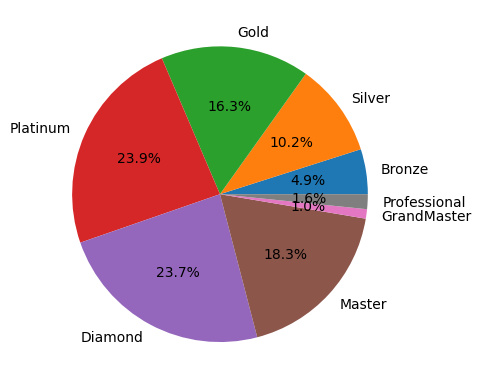

In [748]:
pie_data = sc_player_data['LeagueIndex'].value_counts().reset_index().sort_values(by='LeagueIndex').reset_index(drop=True)
plt.pie(pie_data['count'],labels=['Bronze','Silver','Gold','Platinum','Diamond','Master','GrandMaster','Professional'],autopct='%1.1f%%')
plt.show()

### Feature Variables 
There are 19 feature variables to explore. However, GameID is unique for each row and will therefore provide no value to a
model. As a result, we can remove GameID.

In [749]:
sc_player_data.drop(columns=['GameID'],inplace=True)
sc_player_data.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


#### Univariate Analysis

#### Age 

In [750]:
sc_player_data.groupby(by=['LeagueIndex'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,22.724551,5.522860,16.0,19.0,21.0,26.0,40.0
2,347.0,22.155620,5.091531,16.0,18.0,21.0,25.0,43.0
3,553.0,22.050633,4.901305,16.0,18.0,21.0,24.0,41.0
4,811.0,21.981504,4.141736,16.0,19.0,21.0,24.0,44.0
5,806.0,21.362283,3.662164,16.0,18.0,21.0,24.0,37.0
6,621.0,20.677939,3.030381,16.0,18.0,20.0,22.0,31.0
7,35.0,21.171429,2.864444,16.0,19.0,22.0,23.0,26.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It appears that we have no Age values for Professionals and will have to impute data to replace the nan values. To do this, we will replace the nan values with the mean age across all league indices. 

The STD decreases as the rank increases. This makes sense as it is likely that those who would like to casually game would encompass more older gamers who have limited time to play as well as younger players who have just started learning the game.

In [751]:
sc_player_data['Age'] = sc_player_data['Age'].fillna(sc_player_data['Age'].mean())

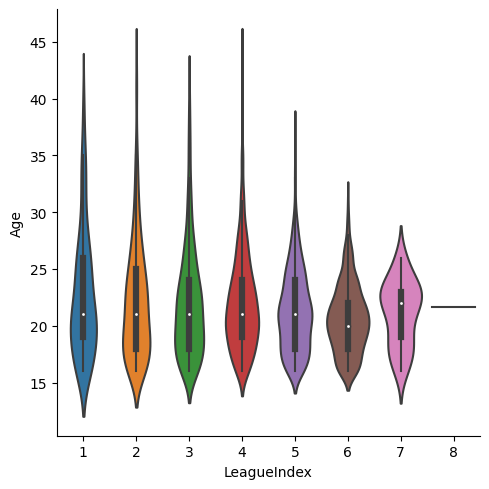

In [753]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="Age",kind="violin")

#### HoursPerWeek

In [754]:
sc_player_data.groupby(by=['LeagueIndex'])['HoursPerWeek'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,13.125749,9.405317,2.0,8.0,12.0,16.0,70.0
2,347.0,13.296830,9.594740,2.0,8.0,10.0,18.0,72.0
3,553.0,13.949367,9.744432,2.0,8.0,12.0,20.0,80.0
4,811.0,14.022195,10.205518,2.0,8.0,12.0,20.0,96.0
5,805.0,16.183851,11.370556,2.0,8.0,12.0,20.0,96.0
6,621.0,21.088567,15.125290,0.0,10.0,20.0,28.0,168.0
7,35.0,31.714286,20.626327,6.0,15.0,28.0,42.0,98.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Similarly to Age, it appears that the Professional rank has no data for how many hours they have spent playing StarCraft 2 per week.

The mean hours spent per week increases as rank increases. This makes logical sense as more time spent = more practice = better at the game. But also the higher rank you are could indicate a higher chance that you game as a career (e.g. streaming). 

Since 8 represents Professional, we will impute the missing values with 40 hours per week to represent the traditional 40 hour week. Professionals likely spend more hours (scrimmages, practices, livestreaming, etc.) but this will be the solution as it would be hard to gauge an accurate number and taking the mean would not represent this feature accurately as well.

We also observe that the max value for Rank 7 is 168 hours! This would mean they have played the game literally 24/7. We would have to remove this outlier.

In [755]:
sc_player_data['HoursPerWeek'] = sc_player_data['HoursPerWeek'].fillna(40) # filling na value with 40 hour work week

In [756]:
sc_player_data = sc_player_data[sc_player_data['HoursPerWeek'] != 168] # removing outlier

In [757]:
sc_player_data.groupby(by=['LeagueIndex'])['HoursPerWeek'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,13.125749,9.405317,2.0,8.0,12.0,16.0,70.0
2,347.0,13.296830,9.594740,2.0,8.0,10.0,18.0,72.0
3,553.0,13.949367,9.744432,2.0,8.0,12.0,20.0,80.0
4,811.0,14.022195,10.205518,2.0,8.0,12.0,20.0,96.0
5,806.0,16.213400,11.394414,2.0,8.0,12.0,20.0,96.0
6,620.0,20.851613,13.936293,0.0,10.0,20.0,28.0,140.0
7,35.0,31.714286,20.626327,6.0,15.0,28.0,42.0,98.0
8,55.0,40.000000,0.000000,40.0,40.0,40.0,40.0,40.0


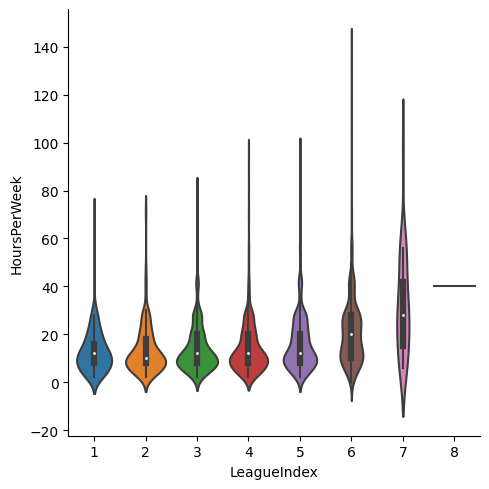

In [758]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="HoursPerWeek",kind="violin")

#### TotalHours

In [759]:
sc_player_data.groupby(by=['LeagueIndex'])['TotalHours'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,264.191617,265.060164,12.0,71.0,200.0,400.0,1870.0
2,347.0,331.409222,289.403722,10.0,110.0,250.0,500.0,2000.0
3,553.0,493.792043,624.206083,3.0,200.0,400.0,600.0,10260.0
4,811.0,588.006165,741.306772,7.0,300.0,500.0,730.0,18000.0
5,804.0,2024.493781,35251.787171,25.0,400.0,700.0,900.0,1000000.0
6,620.0,987.967742,1120.789647,50.0,600.0,800.0,1200.0,25000.0
7,35.0,1581.028571,1652.020679,240.0,715.0,1250.0,2000.0,10000.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Professional rank contains no data for TotalHours played and will need to be replaced as well. But we also observe that for rank 5, the max value is 1,000,000 hours which is more than 114 years. This outlier will have to be removed.

In [760]:
sc_player_data = sc_player_data[sc_player_data['TotalHours'] != 1000000] # removing outlier

In [761]:
sc_player_data.groupby(by=['LeagueIndex'])['TotalHours'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,264.191617,265.060164,12.0,71.0,200.0,400.0,1870.0
2,347.0,331.409222,289.403722,10.0,110.0,250.0,500.0,2000.0
3,553.0,493.792043,624.206083,3.0,200.0,400.0,600.0,10260.0
4,811.0,588.006165,741.306772,7.0,300.0,500.0,730.0,18000.0
5,803.0,781.684932,923.144289,25.0,400.0,700.0,900.0,20000.0
6,620.0,987.967742,1120.789647,50.0,600.0,800.0,1200.0,25000.0
7,35.0,1581.028571,1652.020679,240.0,715.0,1250.0,2000.0,10000.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The STD within each LeagueIndex is quite large, as a result, it may not provide great value for our model. 

As rank increases, the total hours played also increases, which makes sense for the same reasons for hoursperweek. We can try using a exponential curve to roughly interpolate the mean value for Professionals.

In [762]:
mean_total_hours = sc_player_data.groupby(by=['LeagueIndex'])['TotalHours'].mean().reset_index()
mean_total_hours

,LeagueIndex,TotalHours
0,1,264.191617
1,2,331.409222
2,3,493.792043
3,4,588.006165
4,5,781.684932
5,6,987.967742
6,7,1581.028571
7,8,NaN


<Axes: xlabel='LeagueIndex', ylabel='TotalHours'>

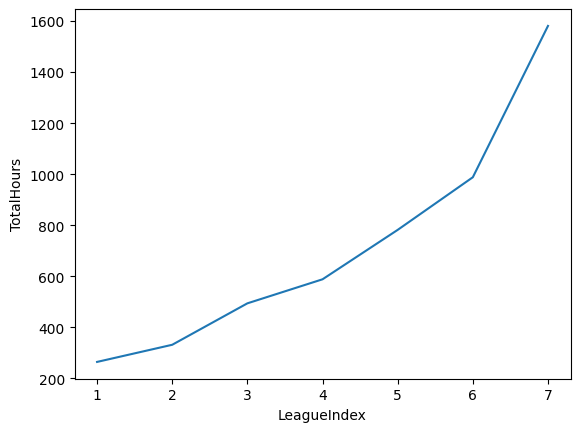

In [763]:
sns.lineplot(data=mean_total_hours, x="LeagueIndex", y="TotalHours")

In [764]:
# Curve Fitting (exponential)
def f(x, m, c):
    return m*x**2+c 
def interpolate(s):
    temp = s.dropna()
    popt, pcov = sp.optimize.curve_fit(f, temp.index, temp)
    output = [i for i in f(s.index, *popt)] 
    return pd.Series(output)

In [765]:
config = {'TotalHours':interpolate}               

interpolated = mean_total_hours.agg(config)
interpolated['LeagueIndex'] = mean_total_hours['LeagueIndex']
interpolated

,TotalHours,LeagueIndex
0,285.478493,1
1,318.772239,2
2,418.653475,3
3,585.122203,4
4,818.178421,5
5,1117.822131,6
6,1484.053331,7
7,1916.872023,8


<Axes: xlabel='LeagueIndex', ylabel='TotalHours'>

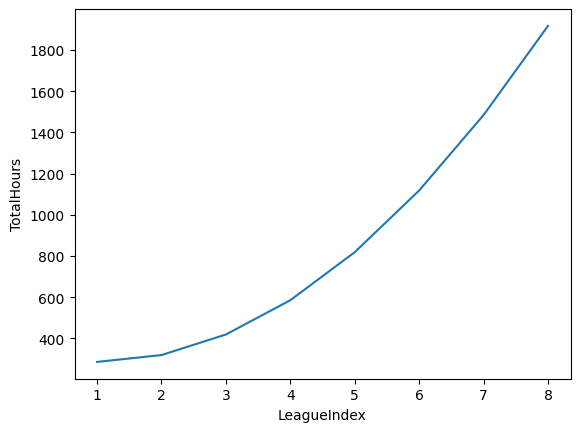

In [766]:
sns.lineplot(data=interpolated, x="LeagueIndex", y="TotalHours")

Not a great fit, but will work as a temporary solution

In [767]:
sc_player_data['TotalHours'].fillna(1916.87,inplace=True)

C:\Users\isacm\AppData\Local\Temp\ipykernel_11852\649950533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_player_data['TotalHours'].fillna(1916.87,inplace=True)


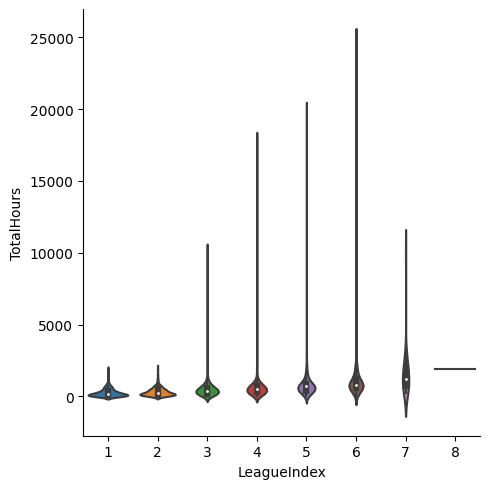

In [768]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="TotalHours",kind="violin")

#### APM

In [769]:
sc_player_data.groupby(by=['LeagueIndex'])['APM'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,59.539277,23.429443,22.0596,43.3191,54.0450,72.50430,172.9530
2,347.0,74.780917,23.855401,24.6648,57.2142,71.6754,89.21310,179.6250
3,553.0,89.971260,30.661156,29.8188,68.1390,85.9590,104.85300,226.6554
4,811.0,105.847166,33.818724,38.0280,80.7396,103.8072,123.72810,249.0210
5,805.0,131.334502,41.385979,49.7358,102.8352,126.0000,152.03100,372.6426
6,620.0,158.562852,48.256035,65.3730,125.1261,152.1822,187.18485,389.8314
7,35.0,189.555686,40.792493,115.7556,168.1215,185.3424,212.37510,298.7952
8,55.0,267.341236,56.183006,146.3892,222.2286,274.3404,313.27830,375.8664


Higher APM or actions per minute seems to have a positive relationship with higher ranks. This makes sense as the better you are at the game, the better your coordination and also knowledge of what to do. 

This would be a good feature to use for our model.

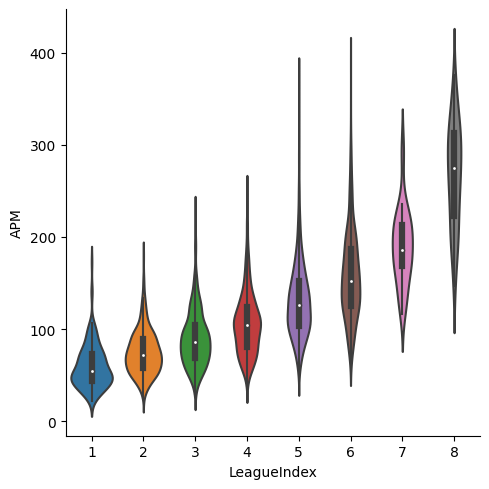

In [770]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="APM",kind="violin")

#### SelectByHotkeys

In [771]:
sc_player_data.groupby(by=['LeagueIndex'])['SelectByHotkeys'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,0.001081,0.001498,0.000000,0.000293,0.000672,0.001370,0.013986
2,347.0,0.001536,0.001663,0.000000,0.000581,0.001095,0.001847,0.013991
3,553.0,0.002188,0.002371,0.000000,0.000884,0.001557,0.002541,0.019578
4,811.0,0.003150,0.003367,0.000000,0.001259,0.002167,0.003798,0.032452
5,805.0,0.004957,0.004878,0.000053,0.002098,0.003442,0.006082,0.042258
6,620.0,0.007420,0.006412,0.000122,0.003092,0.005473,0.009560,0.043088
7,35.0,0.009418,0.004987,0.002693,0.005737,0.008216,0.011948,0.026770
8,55.0,0.020981,0.009299,0.004582,0.014308,0.019817,0.028263,0.042576


It looks like there is a positive relationship between rank and SelectByHotkeys. However, the values are quite small so a model may have a difficult time with the complexity. This relationship makes sense as utilizing hotkeys enables more actions. This feauture could be correlated with APM. 

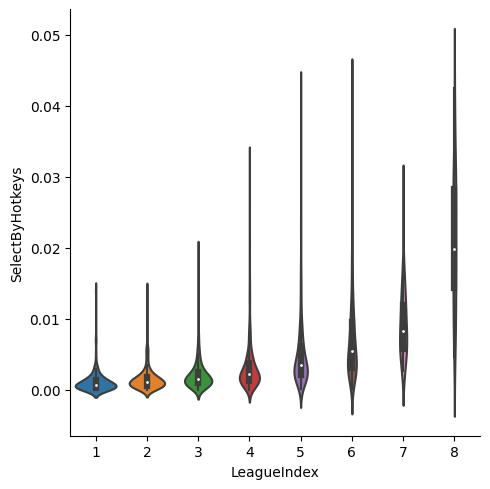

In [773]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="SelectByHotkeys",kind="violin")

#### AssignToHotkeys

In [775]:
sc_player_data.groupby(by=['LeagueIndex'])['AssignToHotkeys'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,0.000185,0.000133,0.000000,0.000091,0.000152,0.000251,0.000668
2,347.0,0.000222,0.000148,0.000000,0.000106,0.000186,0.000321,0.000690
3,553.0,0.000282,0.000163,0.000000,0.000153,0.000260,0.000390,0.000918
4,811.0,0.000340,0.000182,0.000023,0.000205,0.000331,0.000450,0.001648
5,805.0,0.000414,0.000187,0.000031,0.000286,0.000409,0.000526,0.001175
6,620.0,0.000511,0.000212,0.000065,0.000366,0.000494,0.000628,0.001376
7,35.0,0.000723,0.000277,0.000310,0.000497,0.000698,0.000894,0.001387
8,55.0,0.000937,0.000349,0.000266,0.000683,0.000874,0.001158,0.001752


Similar to SelectByHotkeys, there is a positive relationship but the values are quite small so the model may have a hard time modeling the differences.

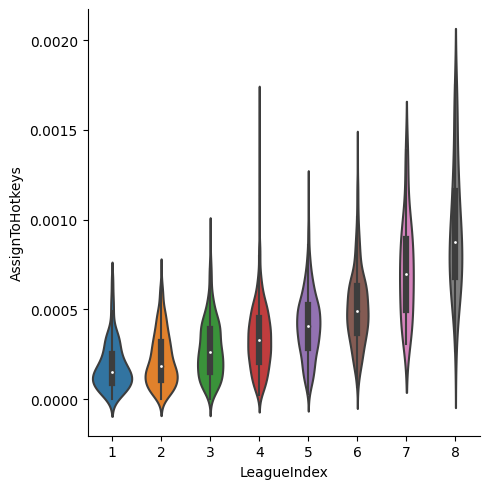

In [776]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="AssignToHotkeys",kind="violin")

#### UniqueHotkeys

In [778]:
sc_player_data.groupby(by=['LeagueIndex'])['UniqueHotkeys'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,3.215569,2.056784,0.0,2.0,3.0,5.0,10.0
2,347.0,3.351585,2.169885,0.0,2.0,3.0,5.0,10.0
3,553.0,3.687161,2.344775,0.0,2.0,4.0,5.0,10.0
4,811.0,3.971640,2.175721,0.0,2.0,4.0,5.0,10.0
5,805.0,4.699379,2.282109,0.0,3.0,5.0,6.0,10.0
6,620.0,5.514516,2.046657,0.0,4.0,5.0,7.0,10.0
7,35.0,6.771429,1.699234,4.0,5.5,7.0,8.0,10.0
8,55.0,7.345455,2.110101,4.0,6.0,7.0,10.0,10.0


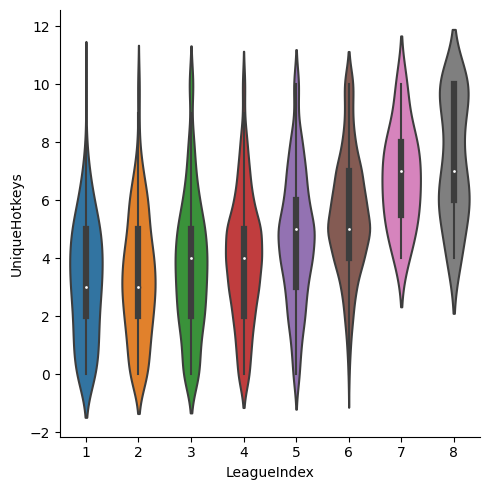

In [779]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="UniqueHotkeys",kind="violin")

UniqueHotkeys may not be a good feature to choose as ranks 1 - 4 are relatively the same until rank 5. It may be useful in combination with other features.

The difficulty of using more than 4 hotkeys may explain why higher ranks utilize more hotkeys.

#### MinimapAttacks

In [781]:
sc_player_data.groupby(by=['LeagueIndex'])['MinimapAttacks'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,0.000028,0.000052,0.00000,0.000000,0.000000,0.000029,0.000261
2,347.0,0.000045,0.000089,0.00000,0.000000,0.000014,0.000045,0.000879
3,553.0,0.000056,0.000103,0.00000,0.000000,0.000021,0.000072,0.001530
4,811.0,0.000075,0.000109,0.00000,0.000000,0.000035,0.000096,0.000889
5,805.0,0.000115,0.000192,0.00000,0.000014,0.000058,0.000134,0.003019
6,620.0,0.000156,0.000203,0.00000,0.000031,0.000092,0.000203,0.001974
7,35.0,0.000340,0.000304,0.00001,0.000138,0.000241,0.000394,0.001164
8,55.0,0.000376,0.000295,0.00000,0.000173,0.000350,0.000498,0.001242


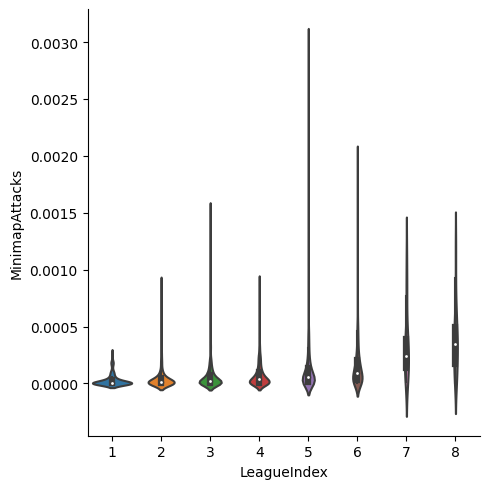

In [782]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="MinimapAttacks",kind="violin")

MinimapAttacks is not often used and does not look like a promising feature for a model.

#### MinimapRightClicks 

In [783]:
sc_player_data.groupby(by=['LeagueIndex'])['MinimapRightClicks'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,0.000208,0.000204,0.000000,0.000065,0.000153,0.000304,0.001406
2,347.0,0.000276,0.000286,0.000000,0.000089,0.000196,0.000383,0.002031
3,553.0,0.000332,0.000311,0.000000,0.000125,0.000244,0.000443,0.002274
4,811.0,0.000368,0.000354,0.000000,0.000138,0.000273,0.000473,0.003688
5,805.0,0.000426,0.000374,0.000000,0.000167,0.000317,0.000590,0.003030
6,620.0,0.000474,0.000412,0.000000,0.000191,0.000349,0.000665,0.002821
7,35.0,0.000570,0.000392,0.000025,0.000278,0.000513,0.000780,0.001632
8,55.0,0.000831,0.000861,0.000023,0.000330,0.000569,0.000992,0.004041


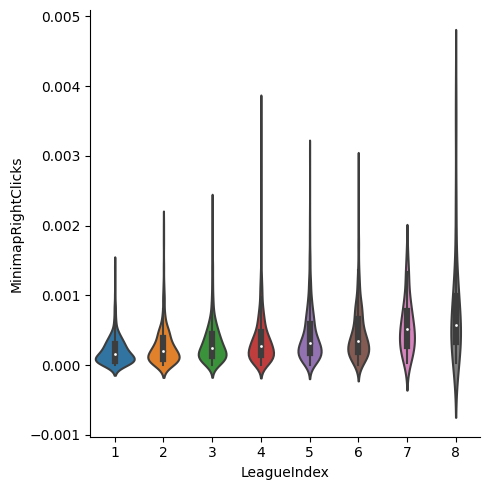

In [784]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="MinimapRightClicks",kind="violin")

Like many other features, the values are quite small and the model could potentially have a hard time modeling the differences.

#### NumberOfPACs 

In [785]:
sc_player_data.groupby(by=['LeagueIndex'])['NumberOfPACs'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,0.002363,0.000656,0.000847,0.001973,0.002290,0.002707,0.005013
2,347.0,0.002650,0.000664,0.000679,0.002246,0.002597,0.003075,0.005138
3,553.0,0.002976,0.000676,0.000861,0.002525,0.002947,0.003410,0.005464
4,811.0,0.003310,0.000707,0.001260,0.002811,0.003323,0.003741,0.005419
5,805.0,0.003742,0.000793,0.001494,0.003198,0.003691,0.004263,0.006206
6,620.0,0.004230,0.000973,0.001404,0.003575,0.004106,0.004787,0.007191
7,35.0,0.005111,0.000997,0.003108,0.004535,0.004952,0.005636,0.007971
8,55.0,0.005237,0.000995,0.003142,0.004490,0.005281,0.005730,0.007780


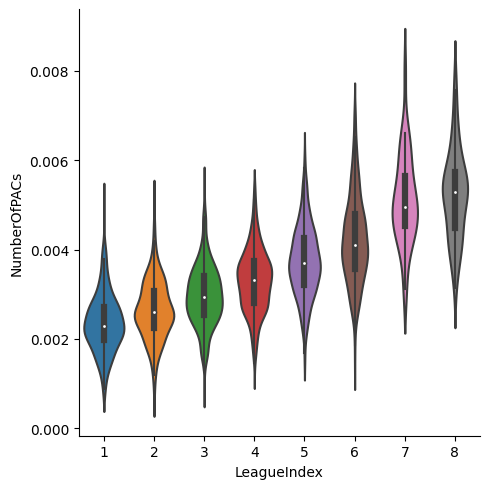

In [786]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="NumberOfPACs",kind="violin")

NumberOfPACs (Perception Action Cycles) looks to quantify a player's ability to multi-task. The better the player, the higher number of PACs per timestamp. This makes sense as the higher ranked player can deal with more in a shorter amount of time compared to lower ranked players. 

#### GapBetweenPACs 

In [788]:
sc_player_data.groupby(by=['LeagueIndex'])['GapBetweenPACs'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,65.654987,29.546172,9.9355,47.334450,58.9492,76.2641,237.1429
2,347.0,53.788886,19.810486,6.6667,39.627700,50.0290,64.8334,156.6234
3,553.0,46.143882,14.921294,14.0488,35.230800,43.8095,54.0364,122.8000
4,811.0,41.041426,13.010377,12.0435,31.594150,39.0909,48.6194,94.1481
5,805.0,34.734685,10.514084,10.8571,27.395000,33.8069,40.8814,84.6087
6,620.0,30.215333,9.173924,11.3287,23.711475,28.9762,35.0933,71.5000
7,35.0,22.978160,6.157568,10.2857,18.613050,22.4855,26.4318,38.7879
8,55.0,18.969773,6.083925,8.1642,15.102150,17.9901,21.7741,35.4127


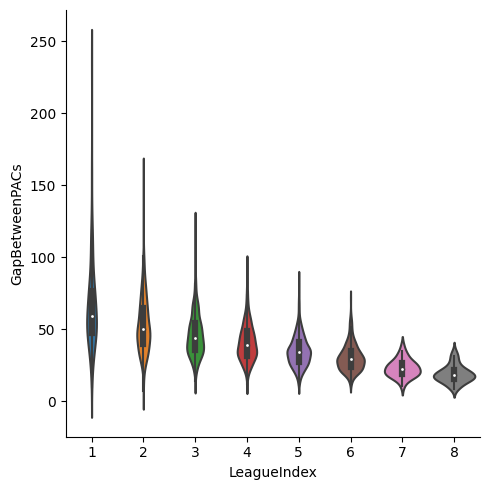

In [789]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="GapBetweenPACs",kind="violin")

The lower the gap between PACs, the higher the rank. This makes sense for reasons stated for NumberOfPACs. Also, this feature may be negatively related with NumberOfPACs because the lower the gap between PACs, the more PACs that can be completed within a timestamp. 

#### ActionLatency

In [790]:
sc_player_data.groupby(by=['LeagueIndex'])['ActionLatency'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,95.404977,24.263149,51.1065,77.883100,93.32710,107.824200,173.5556
2,347.0,81.270053,18.123747,40.0109,68.484000,79.23750,90.175950,176.3721
3,553.0,73.697301,16.579358,36.5848,62.461500,72.09520,83.073400,150.2951
4,811.0,64.793765,13.381490,35.1364,55.523600,62.77000,72.236000,129.8462
5,805.0,56.109800,11.197691,30.7593,48.114000,54.99090,62.716600,103.3760
6,620.0,48.964017,10.422967,24.6326,41.847375,48.06315,55.328475,88.3226
7,35.0,40.342903,6.490887,29.9871,34.907200,39.73130,45.726300,52.3111
8,55.0,35.390153,5.792082,24.0936,31.282950,35.40940,38.579100,54.5588


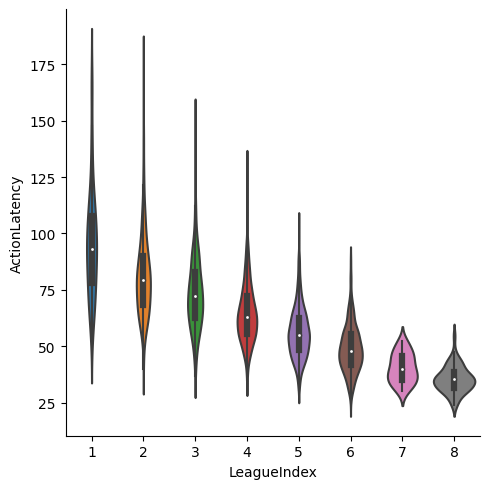

In [791]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="ActionLatency",kind="violin")

Essentially, the faster you can perceive information and utilize the information to act, the higher rank you will likely be due to the fast nature of StarCraft.

#### ActionsInPAC

In [792]:
sc_player_data.groupby(by=['LeagueIndex'])['ActionsInPAC'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,4.548287,1.717667,2.0389,3.252750,4.1588,5.24615,11.0159
2,347.0,5.005949,1.653597,2.3955,3.858550,4.8790,5.77965,17.7619
3,553.0,5.163282,1.538274,2.4540,4.043500,4.9357,6.03900,12.6800
4,811.0,5.236971,1.414238,2.6722,4.252950,5.0491,5.95785,14.6071
5,805.0,5.467554,1.489859,2.7324,4.536000,5.2626,6.07830,18.5581
6,620.0,5.476172,1.366718,2.7108,4.569275,5.2492,6.23870,14.3433
7,35.0,5.226089,1.078309,3.3221,4.344950,5.3062,6.07440,7.2364
8,55.0,5.676727,1.017115,3.8371,4.929500,5.5872,6.45750,7.9615


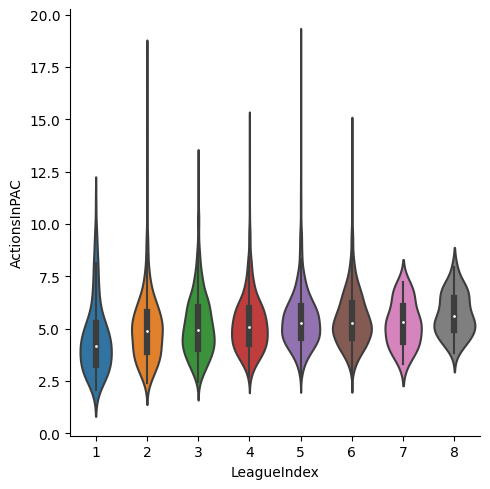

In [793]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="ActionsInPAC",kind="violin")

Values are too similar to seem to provide value for a model. It would make sense that a higher rank player would be able to conduct more actions in a PAC as they utilize more hotkeys per timestamp for faster actions. 

#### TotalMapExplored

In [794]:
sc_player_data.groupby(by=['LeagueIndex'])['TotalMapExplored'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,18.730539,7.076550,7.0,14.0,17.0,23.0,47.0
2,347.0,19.824207,6.513720,5.0,15.0,20.0,24.0,41.0
3,553.0,20.506329,6.713364,5.0,16.0,20.0,24.0,52.0
4,811.0,22.019729,7.370586,5.0,17.0,21.0,26.0,58.0
5,805.0,23.068323,7.255058,6.0,18.0,23.0,27.0,53.0
6,620.0,24.277419,7.824229,7.0,18.0,24.0,29.0,56.0
7,35.0,28.028571,8.114931,14.0,24.5,28.0,33.0,53.0
8,55.0,22.854545,6.918623,10.0,18.5,23.0,26.5,46.0


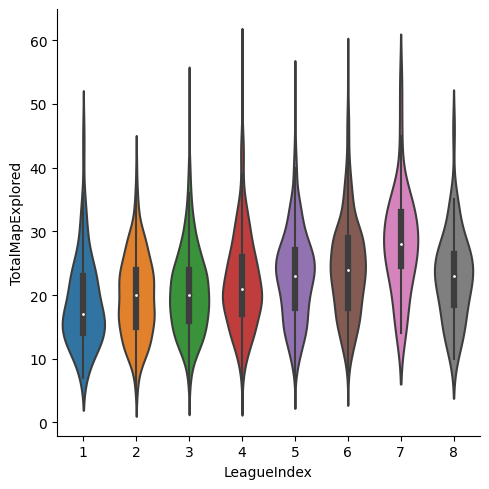

In [795]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="TotalMapExplored",kind="violin")

A higher rated player may need to explore less of the map as they would be more familiar with the terrain. This would also vary depending on the strategy utilized. As a result, this feature may not provide much value to a model. 

#### WorkersMade

In [796]:
sc_player_data.groupby(by=['LeagueIndex'])['WorkersMade'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,0.000626,0.000316,0.000077,0.000406,0.000553,0.000755,0.002060
2,347.0,0.000801,0.000388,0.000165,0.000537,0.000723,0.000953,0.002772
3,553.0,0.000919,0.000439,0.000284,0.000625,0.000808,0.001135,0.003737
4,811.0,0.001006,0.000475,0.000242,0.000680,0.000883,0.001206,0.003550
5,805.0,0.001168,0.000552,0.000279,0.000793,0.001020,0.001409,0.005149
6,620.0,0.001212,0.000560,0.000282,0.000823,0.001061,0.001459,0.004120
7,35.0,0.001238,0.000697,0.000484,0.000711,0.001009,0.001429,0.003191
8,55.0,0.001077,0.000440,0.000478,0.000785,0.000950,0.001270,0.002459


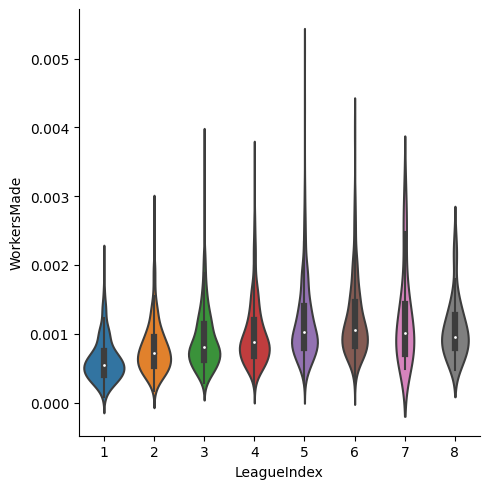

In [797]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="WorkersMade",kind="violin")

There is too much variability relative to the target variable to provide any value to the model. Also, more workers does not mean a higher win rate. It all depends on strategy and playstyle.

#### UniqueUnitsMade

In [798]:
sc_player_data.groupby(by=['LeagueIndex'])['UniqueUnitsMade'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,5.826347,1.780016,2.0,5.0,6.0,7.0,11.0
2,347.0,6.074928,1.783071,2.0,5.0,6.0,7.0,13.0
3,553.0,6.368897,1.706098,2.0,5.0,6.0,7.0,11.0
4,811.0,6.573366,1.819098,2.0,5.0,7.0,8.0,13.0
5,805.0,6.700621,1.888315,3.0,5.0,7.0,8.0,13.0
6,620.0,6.864516,1.947875,2.0,6.0,7.0,8.0,12.0
7,35.0,7.028571,1.901790,3.0,6.0,7.0,8.0,11.0
8,55.0,6.127273,1.764407,3.0,5.0,6.0,7.0,11.0


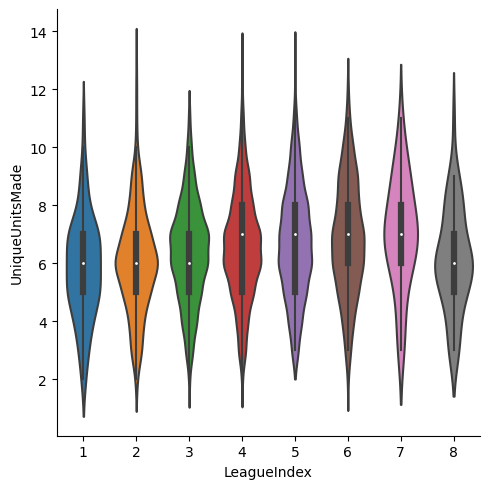

In [799]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="UniqueUnitsMade",kind="violin")

Similar to WorkersMade, creating a higher number of unique units does not indicate a greater chance of winning. Some strategies may only need a few number of units to win depending on strategy and opponents.

#### ComplexUnitsMade

In [800]:
sc_player_data.groupby(by=['LeagueIndex'])['ComplexUnitsMade'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,0.000015,0.000045,0.0,0.0,0.0,0.000000,0.000318
2,347.0,0.000024,0.000071,0.0,0.0,0.0,0.000000,0.000494
3,553.0,0.000045,0.000096,0.0,0.0,0.0,0.000034,0.000590
4,811.0,0.000065,0.000118,0.0,0.0,0.0,0.000099,0.000786
5,805.0,0.000076,0.000119,0.0,0.0,0.0,0.000132,0.000902
6,620.0,0.000077,0.000125,0.0,0.0,0.0,0.000126,0.000781
7,35.0,0.000082,0.000125,0.0,0.0,0.0,0.000121,0.000386
8,55.0,0.000026,0.000078,0.0,0.0,0.0,0.000000,0.000457


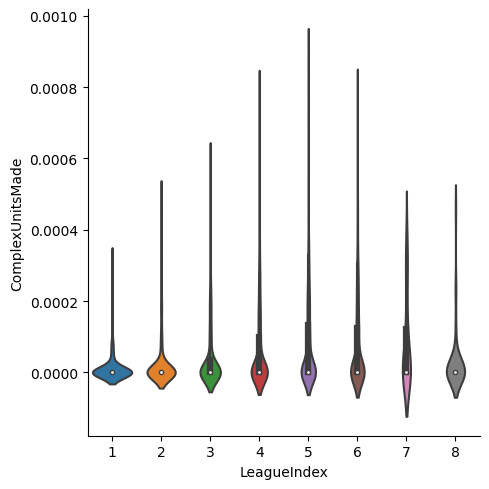

In [801]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="ComplexUnitsMade",kind="violin")

Again, a large number of complex units are not required for a winning strategy and will not be useful to differentiate good players from bad players. 

#### ComplexAbilitiesUsed

In [802]:
sc_player_data.groupby(by=['LeagueIndex'])['ComplexAbilitiesUsed'].describe()

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,,,,,,,,
1,167.0,0.000042,0.000096,0.0,0.0,0.000000,0.000045,0.000630
2,347.0,0.000076,0.000200,0.0,0.0,0.000000,0.000057,0.001763
3,553.0,0.000117,0.000257,0.0,0.0,0.000000,0.000129,0.002664
4,811.0,0.000138,0.000245,0.0,0.0,0.000029,0.000176,0.002186
5,805.0,0.000176,0.000282,0.0,0.0,0.000066,0.000230,0.003084
6,620.0,0.000181,0.000293,0.0,0.0,0.000051,0.000264,0.002443
7,35.0,0.000267,0.000588,0.0,0.0,0.000040,0.000235,0.002685
8,55.0,0.000135,0.000246,0.0,0.0,0.000000,0.000128,0.000959


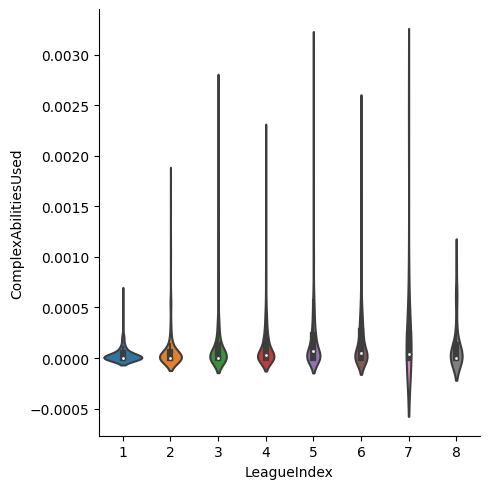

In [803]:
sns.catplot(data=sc_player_data, x="LeagueIndex", y="ComplexAbilitiesUsed",kind="violin")

Same reasoning as ComplexUnitsMade.

## Multi-variate Analysis

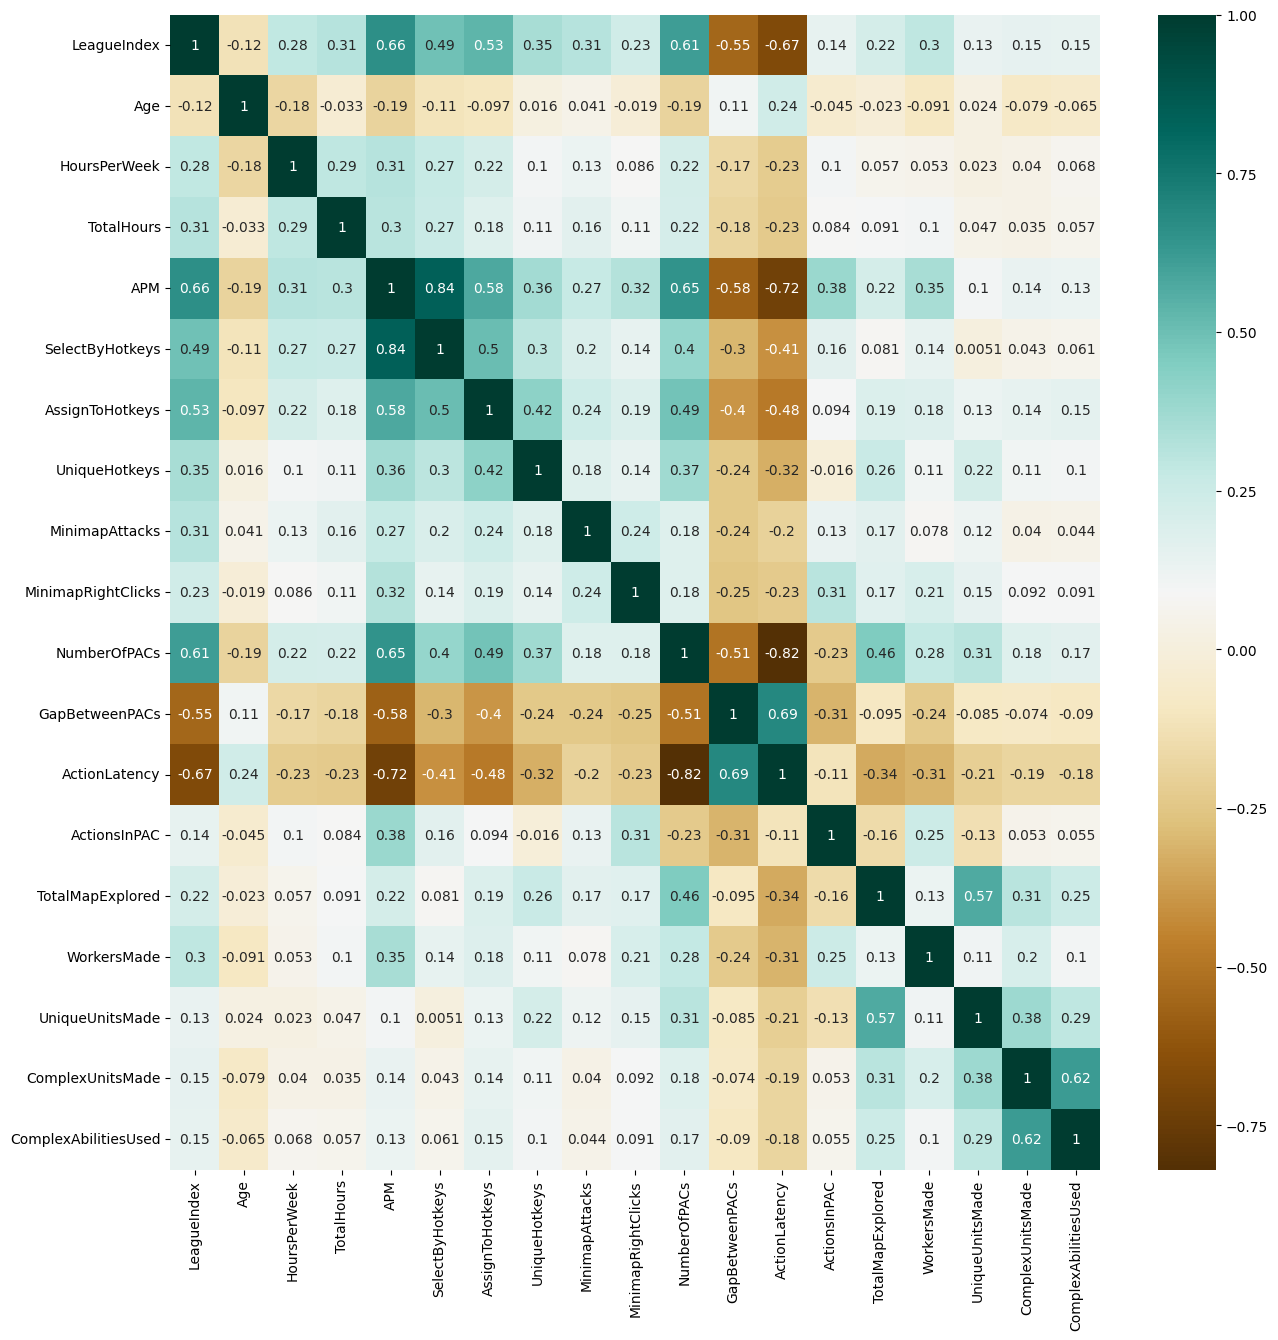

In [777]:
plt.figure(figsize=(15,15))
c = sc_player_data.corr(method='pearson')
corr = sns.heatmap(c,cmap="BrBG",annot=True)

Possible features that could be utilized are: APM, SelectByHotkeys, AssignToHotkeys,NumberOfPACs, ActionLatency, and ActionsInPAC.

It is also important to see if there are features that are correlated to each other to remove redundancy, reduce the features and dimensionality, and increase clarity of the model.

This will be explored in 2-EDA.ipynb